<a href="https://colab.research.google.com/github/cho52o/library_project2019/blob/main/lib_top10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# 일단 import 
%matplotlib inline  
import matplotlib
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [ ]:
print("Matplotlib version", matplotlib.__version__)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Matplotlib version 3.1.1


In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 132681 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumGothic Eco


In [ ]:
L = pd.read_csv('/content/drive/My Drive/소통형_도서관/대출목록.csv')

In [ ]:
L181231 = pd.read_csv('/content/drive/My Drive/소통형_도서관/대출목록_20181231_학과별.csv')

In [ ]:
L190630 = pd.read_csv('/content/drive/My Drive/소통형_도서관/대출목록_20190630_학과별.csv')

In [ ]:
L190930 = pd.read_csv('/content/drive/My Drive/소통형_도서관/대출목록_20190930_학과별.csv')

In [ ]:
LB = pd.read_csv('/content/drive/My Drive/소통형_도서관/베스트_이용도서.csv')

In [ ]:
LD = pd.read_excel('/content/drive/My Drive/소통형_도서관/한남대학교_5._도서_대출_이용통계_업로드.xlsx')

In [ ]:
L.head(5)

,학과,등록번호,청구기호,서명,저자,대출일
0,간호학과,569943,158.2 하69ㅍKㄱ,대화기술: 생각을 전하고 마음을 사로잡는 기술,하이브로 무사시,20180710
1,간호학과,594738,910.41 한49ㅂ 2007,바람의 딸 걸어서 지구 세바퀴 반,한비야,20180801
2,간호학과,587517,181.2184 맹71시,孟子論,신동준,20180601
3,간호학과,604495,320.1 M149pKㅅ,(가장 정직한 정치 교과서) 군주론,신재일,20180604
4,간호학과,610803,306.8 G778mKㄱ 2006,화성에서 온 남자 금성에서 온 여자,"그레이, 존",20180917


In [ ]:
L.학과.value_counts().head(5)

도서관회원증       2573
국어국문·창작학과    1610
역사교육과        1025
기독교학과         929
문헌정보학과        924
Name: 학과, dtype: int64

In [ ]:
L.서명.value_counts().head(5)

군주론             56
역사란 무엇인가        52
(다시찾는) 우리역사     44
어린왕자            41
해리포터와 마법사의 돌    40
Name: 서명, dtype: int64

In [ ]:
LB.head()

,등록번호,서명,청구기호,저자,출판사,출판년도,유형,이용빈도
0,778967,나는 나로 살기로 했다 : 냉담한 현실에서 어른살이를 위한 to do list,818.7 김57나,김수현,마음의숲,2016,818.7,20
1,771762,돌이킬 수 없는 약속 : 야쿠마루 가쿠 장편소설,895.636 약96ㅅKㄱ,藥丸岳,북플라자,2017,895.636,20
2,775073,82년생 김지영 : 조남주 장편소설,813.7 조21ㅍ,조남주,민음사,2016,813.7,19
3,793066,죽고 싶지만 떡볶이는 먹고 싶어 : 백세희 에세이,818.7 백539ㅈ,백세희,흔,2018,818.7,17
4,773971,아몬드 : 손원평 장편소설,813.7 손67ㅇ,손원평,창비,2017,813.7,16


In [ ]:
LB_r = LB.서명.value_counts()
LB_r.head(5)

법과 영혼의 대화                                    12
토지 : 박경리 대하소설                                12
(2018 시나공) 컴퓨터활용능력 : 1급 필기                   11
(새로 만든) 먼나라 이웃나라 이원복 교수님과 함께 떠나는 세계 역사 여행    10
신 : 베르나르 베르베르 장편소설                           10
Name: 서명, dtype: int64

In [ ]:
LB_r = LB.서명.value_counts()
LB_r = pd.DataFrame({'서명':LB_r.index, 'count':LB_r.values})
LB_r.head(5)

,서명,count
0,법과 영혼의 대화,12
1,토지 : 박경리 대하소설,12
2,(2018 시나공) 컴퓨터활용능력 : 1급 필기,11
3,(새로 만든) 먼나라 이웃나라 이원복 교수님과 함께 떠나는 세계 역사 여행,10
4,신 : 베르나르 베르베르 장편소설,10


In [ ]:
LB_sum = LB_r['count']*LB['이용빈도']
LB_sum.head(5)

0    240.0
1    240.0
2    209.0
3    170.0
4    160.0
dtype: float64

In [ ]:
LB_r = LB.서명.value_counts()
LB_r = pd.DataFrame({'서명':LB_r.index, 'count':LB_r.values})
LB_sum = LB_r['count']*LB['이용빈도']
LB_r['LB_sum'] = pd.DataFrame({'LB_sum':LB_sum.values})
LB_r.head(5)

,서명,count,LB_sum
0,법과 영혼의 대화,12,240.0
1,토지 : 박경리 대하소설,12,240.0
2,(2018 시나공) 컴퓨터활용능력 : 1급 필기,11,209.0
3,(새로 만든) 먼나라 이웃나라 이원복 교수님과 함께 떠나는 세계 역사 여행,10,170.0
4,신 : 베르나르 베르베르 장편소설,10,160.0


In [ ]:
print('베스트 도서의 평균 이용 빈도는 %.2f%%입니다.' %((LB_r.LB_sum.mean()/L.shape[0])*100))

베스트 도서의 평균 이용 빈도는 0.02%입니다.


> 이상치 제거

findfont: Font family ['NanumGothic Eco'] not found. Falling back to DejaVu Sans.


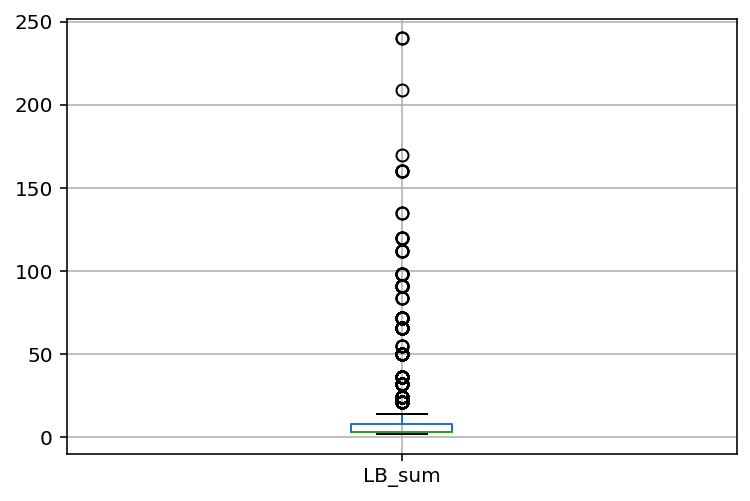

In [ ]:
LB_r.boxplot('LB_sum')

In [ ]:
Q1 = LB_r.LB_sum.quantile(0.25)
Q2 = LB_r.LB_sum.quantile(0.5)
Q3 = LB_r.LB_sum.quantile(0.75)
IQR = Q3-Q1
UI = Q3 + 1.5*IQR
LB_r0 = LB_r[LB_r['LB_sum'] < UI]
LB_r0.shape

(6626, 3)

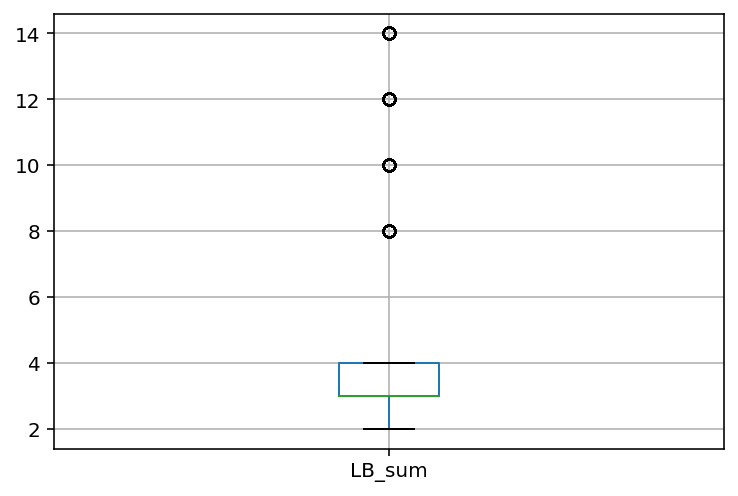

In [ ]:
LB_r0.boxplot('LB_sum')

In [ ]:
Q1 = LB_r0.LB_sum.quantile(0.25)
Q2 = LB_r0.LB_sum.quantile(0.5)
Q3 = LB_r0.LB_sum.quantile(0.75)
IQR = Q3-Q1
UI = Q3 + 1.5*IQR
LB_r1 = LB_r0[LB_r0['LB_sum'] < UI]
LB_r1.shape

(5086, 3)

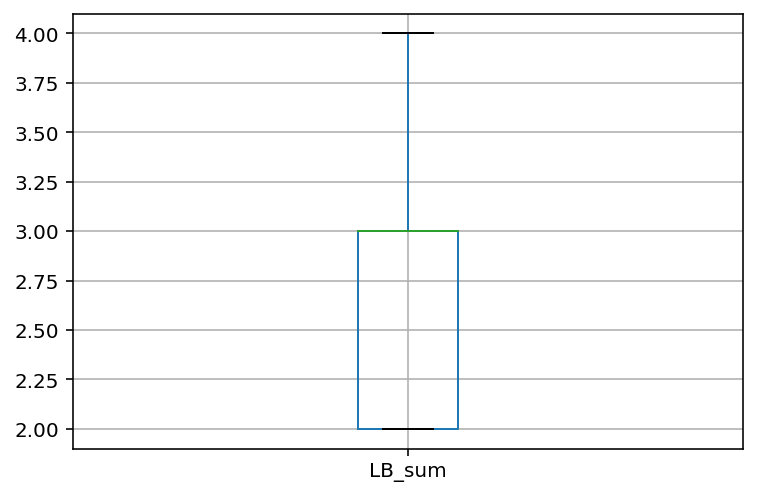

In [ ]:
LB_r1.boxplot('LB_sum')

In [ ]:
print('베스트 이용도서를 이용한 도서관 이용빈도는 %.6f%%입니다.' %((LB_r1.LB_sum.mean()/L.shape[0])*100))

베스트 이용도서를 이용한 도서관 이용빈도는 0.009835%입니다.


In [ ]:
top10 = pd.DataFrame(LB_r, index=[0,1,2,3,4,5,6,7,8,9])
top10

,서명,count,LB_sum
0,법과 영혼의 대화,12,240.0
1,토지 : 박경리 대하소설,12,240.0
2,(2018 시나공) 컴퓨터활용능력 : 1급 필기,11,209.0
3,(새로 만든) 먼나라 이웃나라 이원복 교수님과 함께 떠나는 세계 역사 여행,10,170.0
4,신 : 베르나르 베르베르 장편소설,10,160.0
5,영양사 시험문제집,10,160.0
6,(2019) 선재국어,10,160.0
7,니코마코스 윤리학,10,160.0
8,거시경제학,9,135.0
9,고령화 가족 : 천명관 장편소설,9,135.0


findfont: Font family ['NanumGothic Eco'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/back

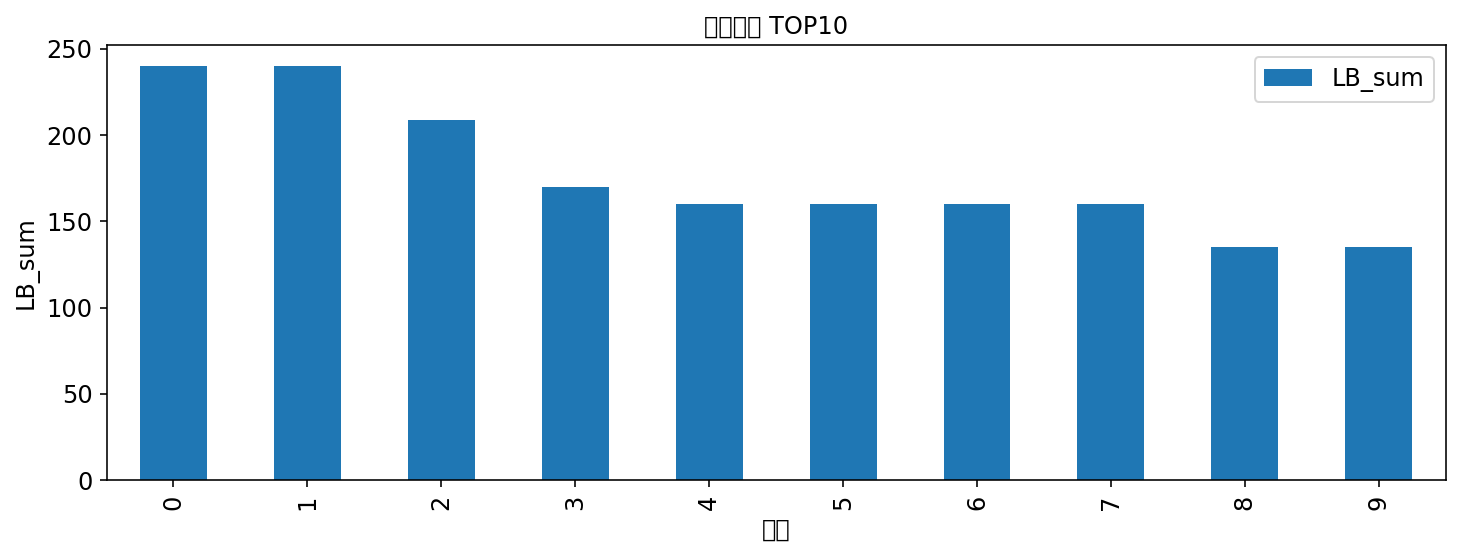

In [ ]:
ax = top10.LB_sum.plot(kind='bar', title='이용빈도 TOP10', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('서명', fontsize=12)          # x축 정보 표시
ax.set_ylabel('LB_sum', fontsize=12)     # y축 정보 표시
ax.legend(['LB_sum'], fontsize=12)    # 범례 지정

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_

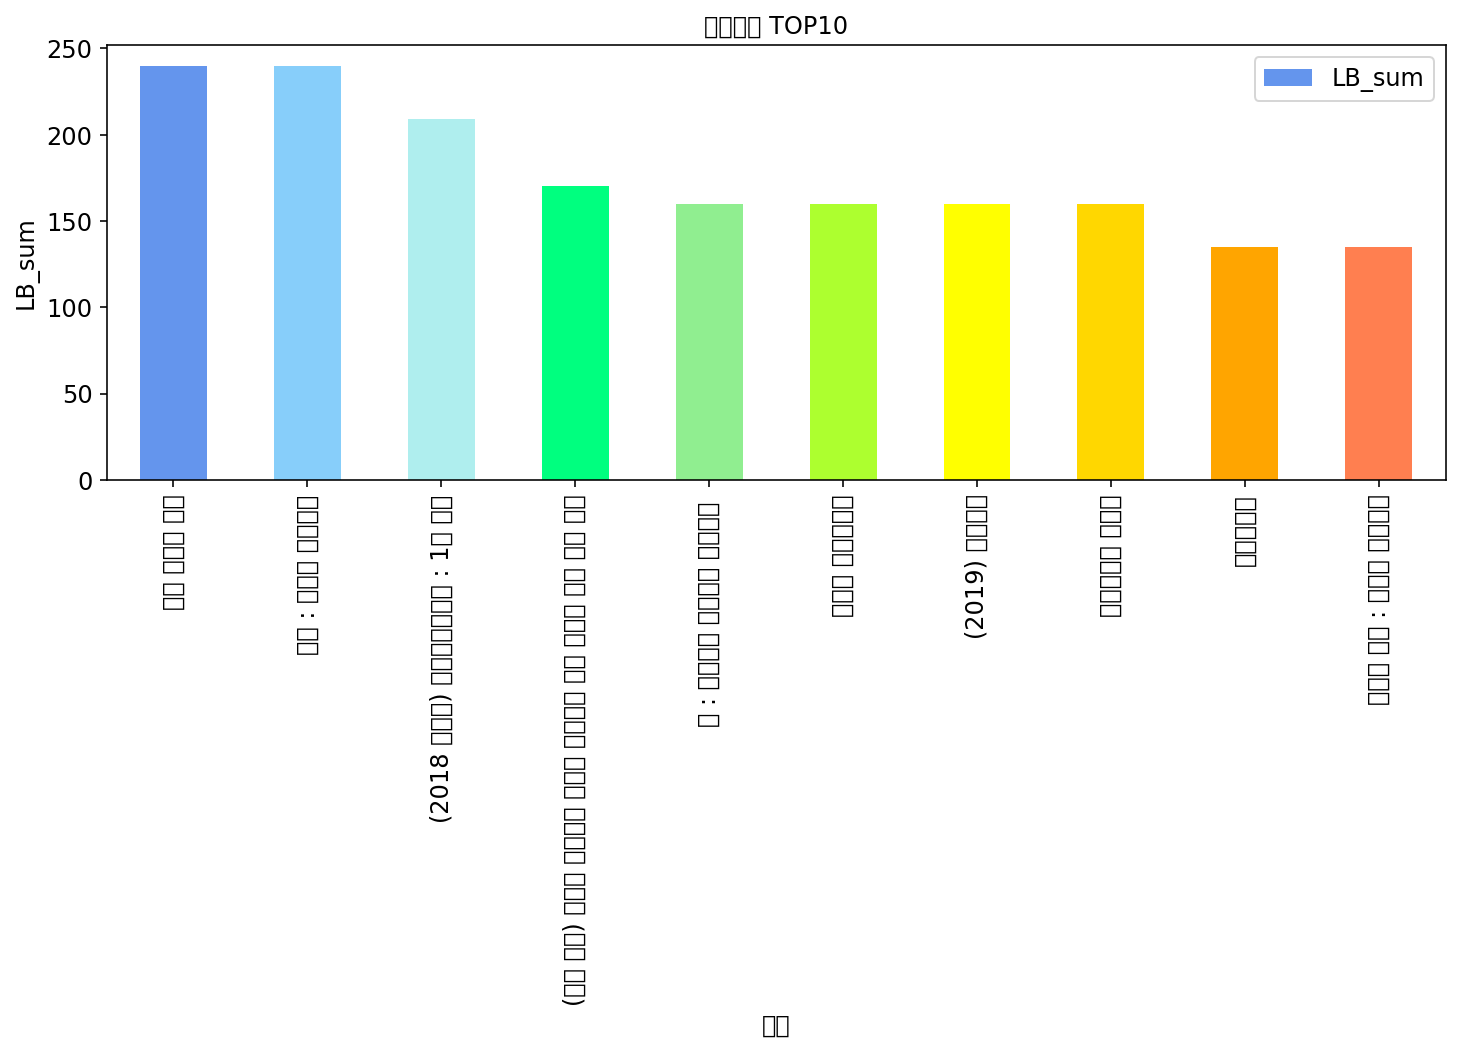

In [ ]:
ax2 = top10.plot(kind='bar', x='서명', y='LB_sum', title='이용빈도 TOP10', color=['cornflowerblue', 'lightskyblue','paleturquoise', 'springgreen',  'lightgreen', 'greenyellow','yellow','gold', 'orange', 'coral'], figsize=(12, 4), legend=True, fontsize=12)
ax2.set_xlabel('서명', fontsize=12)          # x축 정보 표시
ax2.set_ylabel('LB_sum', fontsize=12)     # y축 정보 표시
ax2.legend(['LB_sum'], fontsize=12)    # 범례 지정

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44284 missing from current font.
  font.set_

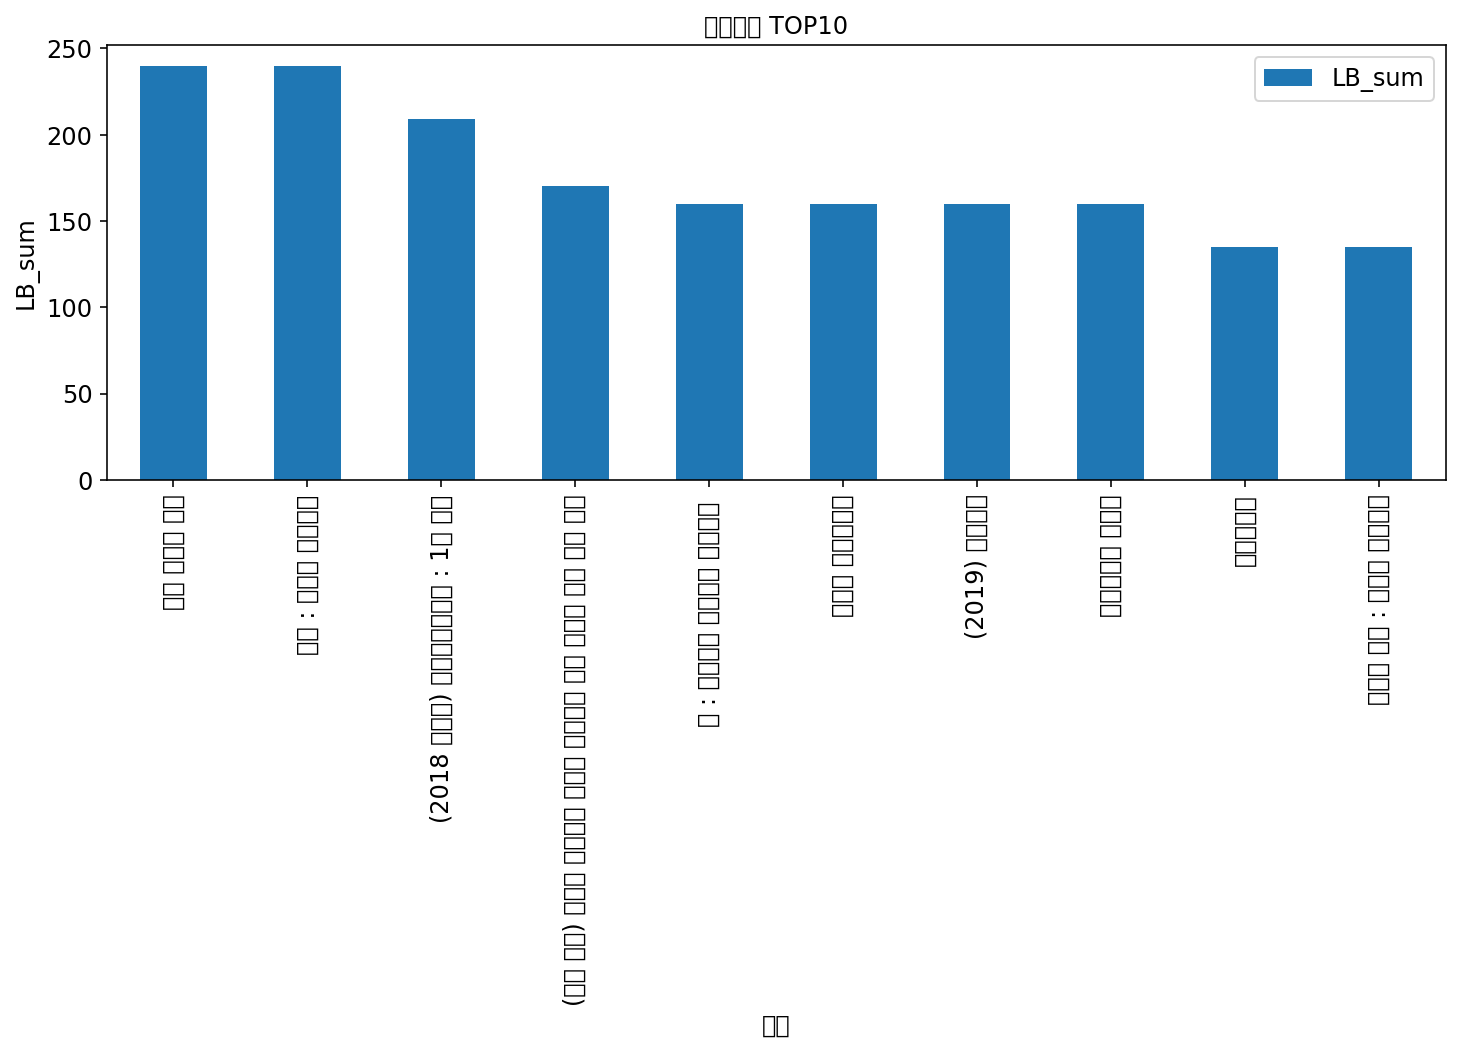

In [ ]:
ax2 = top10.plot(kind='bar', x='서명', y='LB_sum', title='이용빈도 TOP10', figsize=(12, 4), legend=True, fontsize=12)
ax2.set_xlabel('서명', fontsize=12)          # x축 정보 표시
ax2.set_ylabel('LB_sum', fontsize=12)     # y축 정보 표시
ax2.legend(['LB_sum'], fontsize=12)    # 범례 지정

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51313 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52380 missing from current font.
  font.set_

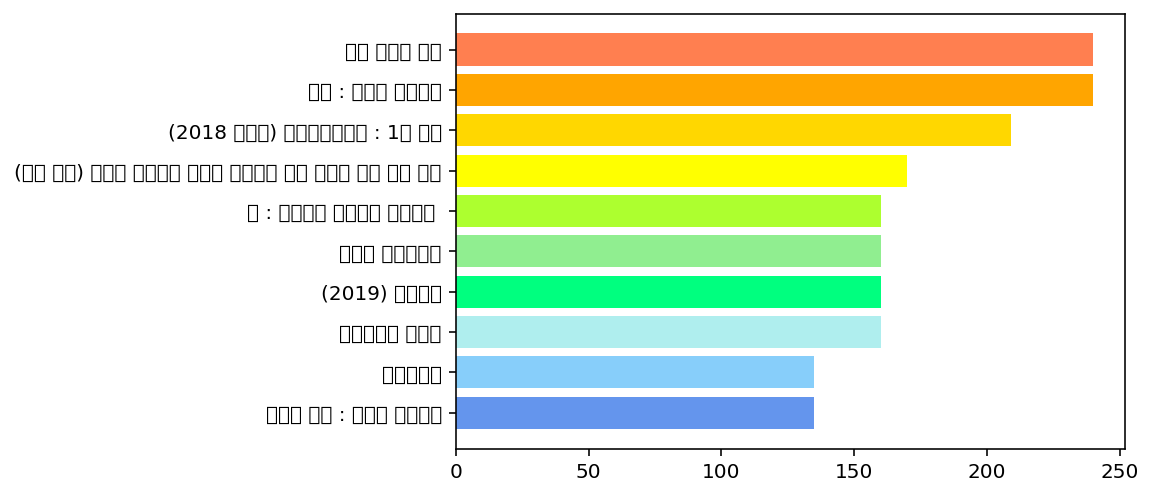

In [ ]:
top10r = pd.DataFrame(LB_r, index=[9,8,7,6,5,4,3,2,1,0])
height = top10r["LB_sum"]
bars = top10r["서명"]
y_pos = np.arange(len(bars))
plt.barh(y_pos, height, 
         color=['cornflowerblue', 'lightskyblue','paleturquoise', 'springgreen',  'lightgreen', 'greenyellow','yellow','gold', 'orange', 'coral'])
#plt.barh(y_pos, height, color=['black','red', 'green', 'blue'])
plt.yticks(y_pos, bars)
plt.show()

글자

https://matplotlib.org/3.1.0/tutorials/text/text_props.html#text-with-non-latin-glyphs



수학기호

https://matplotlib.org/3.1.0/tutorials/text/mathtext.html#mathtext-fonts




https://docs.python.org/3/library/codecs.html#standard-encodings